**Reducción de dimensionalidad / PCA 2 (Core)**

## **PCA 2 (Core)**
Visualización de Datos con Componentes Principales

**Descripción:**

En esta actividad, utilizarás el Análisis de Componentes Principales (PCA) para visualizar datos en un espacio de menor dimensionalidad. Trabajarás con el famoso dataset «Iris» para reducir sus características a dos componentes principales y visualizar cómo se distribuyen las diferentes clases en este nuevo espacio de características.

Enlace al dataset: https://www.kaggle.com/uciml/iris



**Objetivo:**

El objetivo es reducir la dimensionalidad del dataset «Iris» mediante PCA, visualizando las clases en el nuevo espacio bidimensional y evaluando si los componentes principales son capaces de capturar adecuadamente la variabilidad de los datos.


# Descripción de las Variables del DataFrame

| **#** | **Columna**       | **Descripción**                                                                 | **Tipo de Dato** | **Valores Nulos** |
|-------|--------------------|---------------------------------------------------------------------------------|------------------|-------------------|
| 0     | `Id`              | Identificador único para cada registro del conjunto de datos.                   | `int64`          | Ninguno           |
| 1     | `SepalLengthCm`   | Longitud del sépalo en centímetros.                                             | `float64`        | Ninguno           |
| 2     | `SepalWidthCm`    | Ancho del sépalo en centímetros.                                                | `float64`        | Ninguno           |
| 3     | `PetalLengthCm`   | Longitud del pétalo en centímetros.                                             | `float64`        | Ninguno           |
| 4     | `PetalWidthCm`    | Ancho del pétalo en centímetros.                                                | `float64`        | Ninguno           |
| 5     | `Species`         | Especie de la flor (categoría: `setosa`, `versicolor`, `virginica`).            | `object`         | Ninguno           |

## Resumen General
- **Total de filas**: 150
- **Total de columnas**: 6
- **Uso de memoria**: ~7.2 KB
- **Tipos de datos**:
  - Numéricos (`float64`): 4 columnas.
  - Entero (`int64`): 1 columna.
  - Categórico (`object`): 1 columna.

## Notas
- No hay valores nulos en ninguna columna.
- Las medidas de longitud y ancho (sépalos y pétalos) son características numéricas continuas.
- La columna `Species` representa una variable categórica que clasifica las flores en tres especies diferentes.




**Instrucciones:**

**1. Carga de datos:**
* Descarga el dataset «Iris» de Kaggle. Examina las características disponibles, que incluyen el largo y ancho de los sépalos y pétalos de tres especies de flores.
* Asegúrate de que los datos no contengan valores nulos o atípicos.

In [1]:
import pandas as pd

In [2]:
# Cargar el archivo CSV
file_path = "../data/iris.csv"  # Cambia esto a la ruta de tu archivo
df = pd.read_csv(file_path)

# Examinar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# Resumen de las columnas y tipos de datos
print("\nInformación general del dfset:")
print(df.info())

# Estadísticas descriptivas de las variables
print("\nEstadísticas descriptivas:")
print(df.describe())

# Verificar las variables químicas que afectan la calidad del vino
print("\nColumnas del dataset:")
print(df.columns)


Información general del dfset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Estadísticas descriptivas:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000     

**Interpretación de las estadísticas descriptivas:**
* Las medidas de los pétalos (longitud y ancho) son más variables que las del sépalo, como lo indican las mayores desviaciones estándar.
* Hay diferencias significativas entre el mínimo y el máximo en todas las columnas, lo que refleja una diversidad notable en las flores medidas.

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


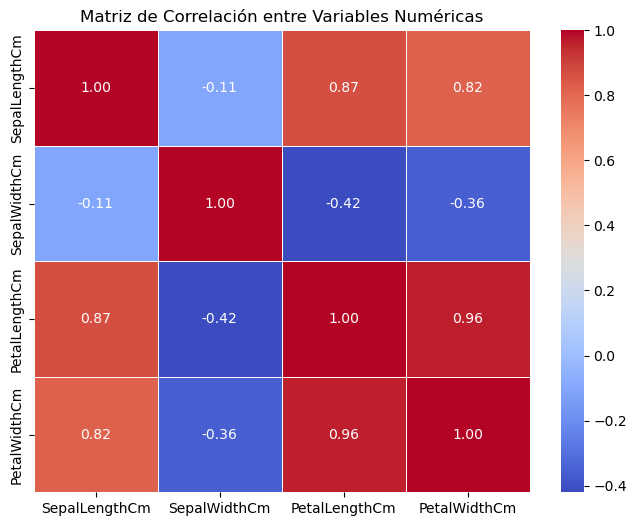

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 # Calcular la correlación entre las variables numéricas
correlation_matrix = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


**La matriz** muestra que la longitud del sépalo está fuertemente correlacionada con la longitud y el ancho del pétalo, pero hay correlaciones más débiles o negativas entre el ancho del sépalo y las medidas del pétalo. Esto podría indicar que la longitud del sépalo y el tamaño de los pétalos tienden a crecer juntos, mientras que el ancho del sépalo tiene una relación menos clara con las otras medidas.

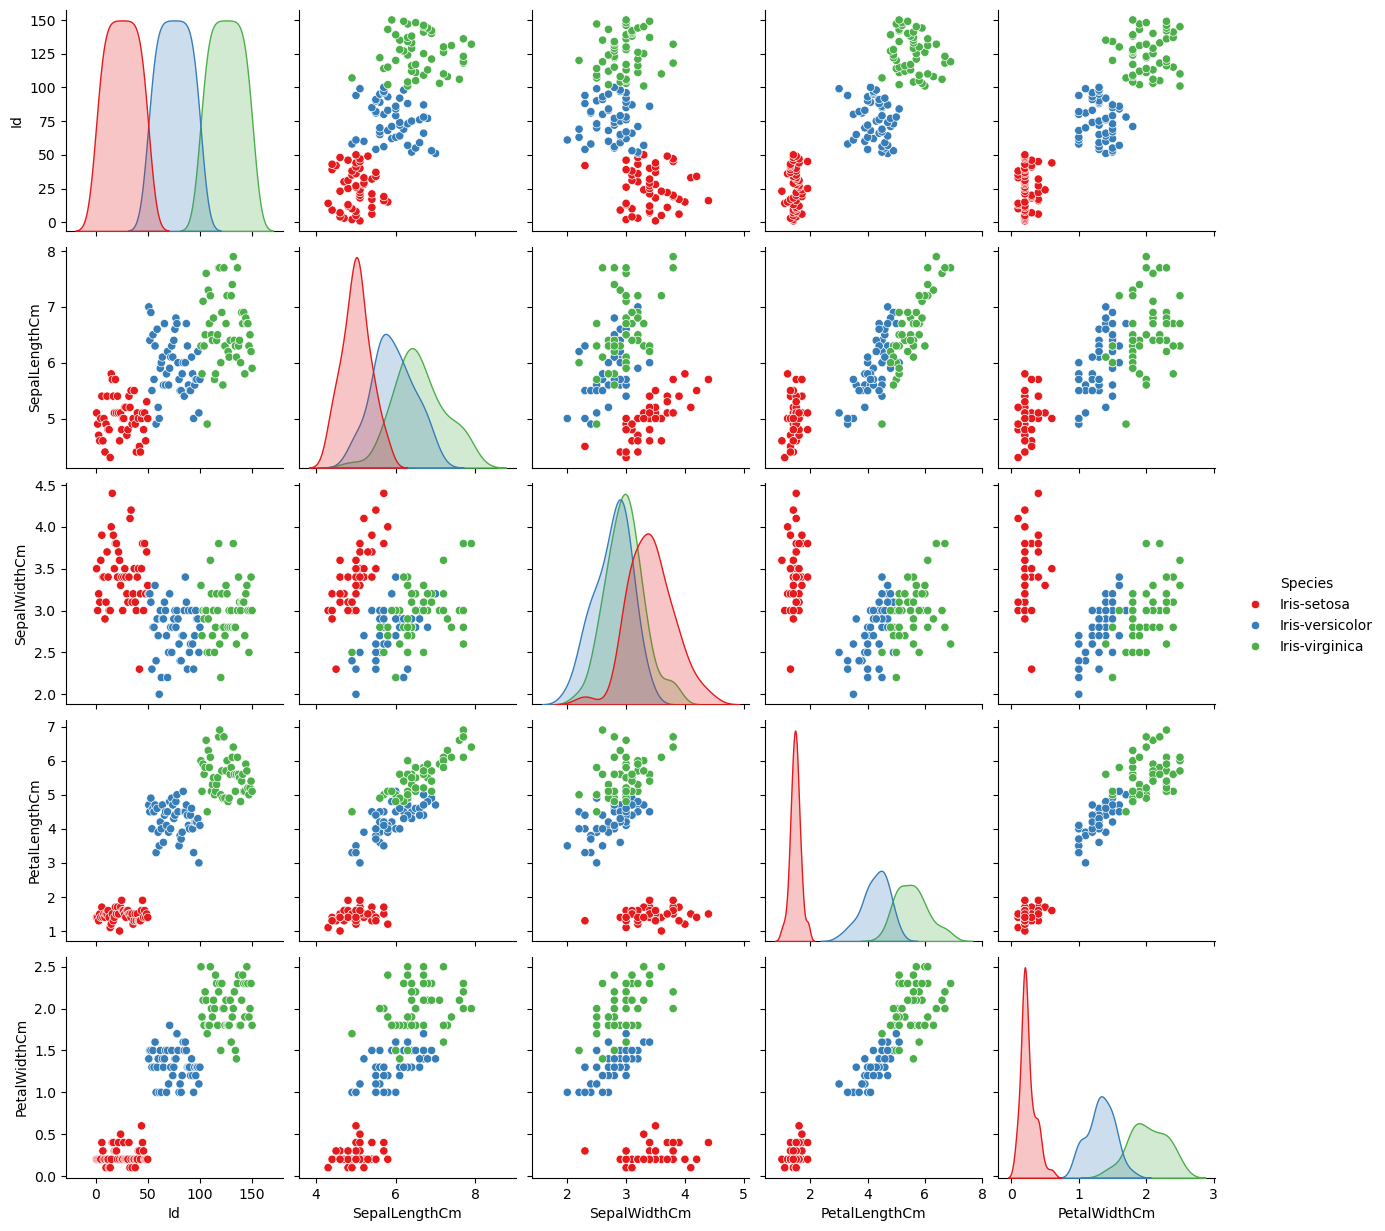

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión para explorar la relación entre las características
sns.pairplot(df, hue="Species", palette="Set1")
plt.show()


In [6]:
# Verificar valores nulos en el dataset
print("Valores nulos en cada columna:")
print(df.isnull().sum())


Valores nulos en cada columna:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
import pandas as pd


# Seleccionar solo las columnas numéricas
df_numeric = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) de cada columna
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = (df_numeric < lower_bound) | (df_numeric > upper_bound)

# Mostrar las filas que contienen outliers
outlier_rows = df[outliers.any(axis=1)]  # Mostrar las filas donde al menos una columna tiene un outlier

print("Outliers detectados:")
print(outlier_rows)

# También puedes obtener solo las filas que contienen outliers por cada columna
outliers_per_column = outliers.sum()
print("\nNúmero de outliers por columna:")
print(outliers_per_column)



Outliers detectados:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
15  16            5.7           4.4            1.5           0.4   
32  33            5.2           4.1            1.5           0.1   
33  34            5.5           4.2            1.4           0.2   
60  61            5.0           2.0            3.5           1.0   

            Species  
15      Iris-setosa  
32      Iris-setosa  
33      Iris-setosa  
60  Iris-versicolor  

Número de outliers por columna:
SepalLengthCm    0
SepalWidthCm     4
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


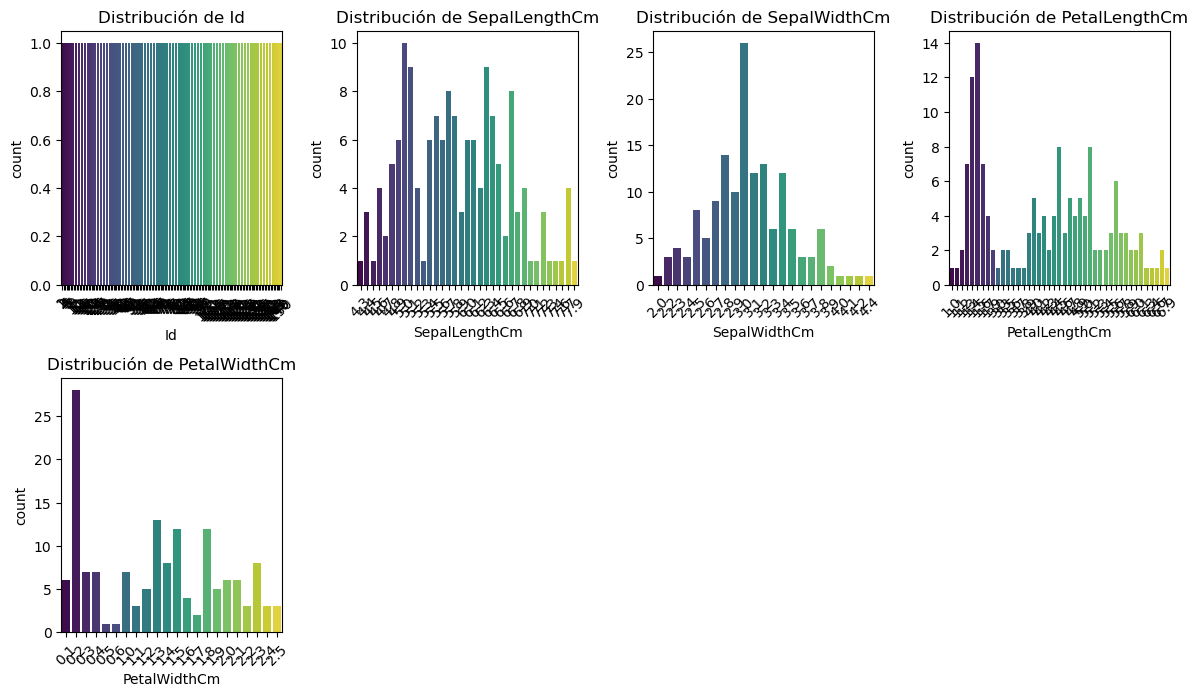

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de las columnas numéricas en el dataset
numeric_columns = df.select_dtypes(include='number').columns

# Crear una figura con varios subgráficos (uno para cada variable numérica)
plt.figure(figsize=(12, 10))

# Crear un gráfico de barras para cada columna numérica
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # 3 filas, 4 columnas, i-esimo gráfico
    sns.countplot(x=df[column], hue=df[column], palette="viridis", legend=False)
    plt.title(f'Distribución de {column}')
    plt.xticks(rotation=45)

plt.tight_layout()  # Ajustar el diseño
plt.show()


**Graficos** 
* **Distribución de 'SepalLengthCm' y 'PetalLengthCm':** Ambas tienen una ligera concentración en valores más bajos, con algunos valores dispersos a lo largo del rango.
* **Distribución de 'SepalWidthCm' y 'PetalWidthCm':** Ambas muestran cierta dispersión, con una concentración de valores alrededor de puntos específicos (2.5 para SepalWidthCm y valores bajos para PetalWidthCm), y algunos valores extremos que podrían ser atípicos.

En conjunto, los gráficos muestran una variabilidad en las medidas de las flores (largo y ancho de sépalo y pétalo), con ciertas tendencias o concentraciones en rangos específicos.

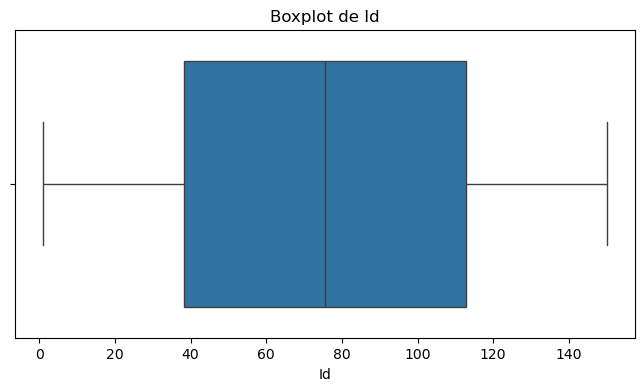

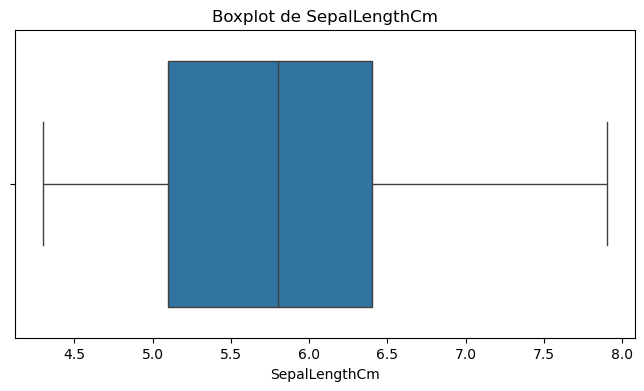

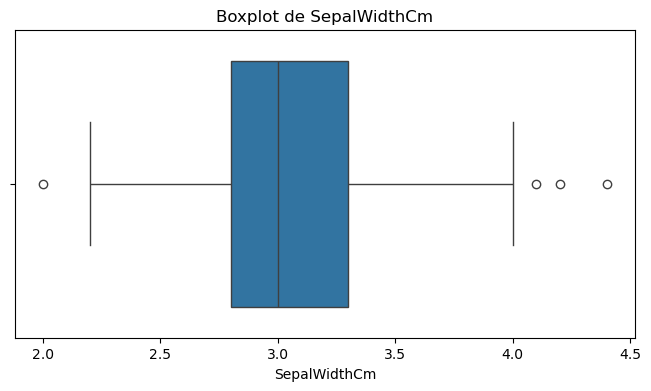

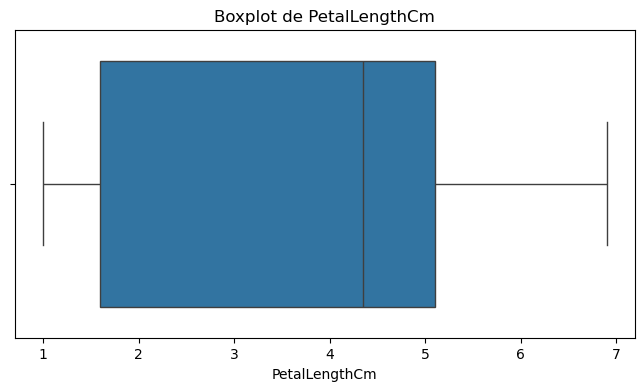

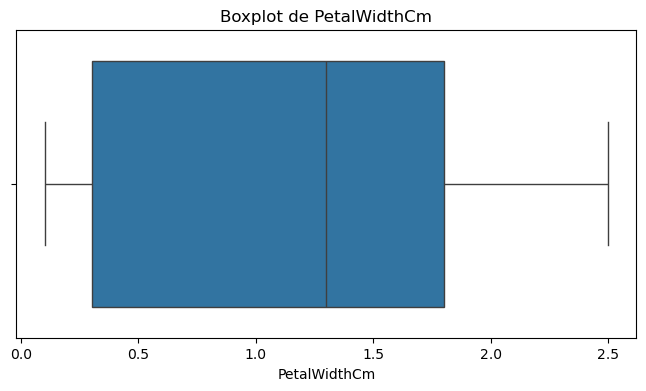

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Excluir la columna 'Species' (que es de tipo categórico o está vacía)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear boxplots para cada variable numérica
for col in numerical_columns:
    if col != 'Species':  # Asegurarse de no incluir la columna 'Species'
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.show()


In [13]:
# Encontrar duplicados (devuelve un booleano por fila)
duplicados = df.duplicated()

# Mostrar las filas duplicadas
print("Duplicados:")
print(df[duplicados])

Duplicados:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
# Contar el número de filas duplicadas
num_duplicados = duplicados.sum()
print(f"Número de filas duplicadas: {num_duplicados}")

Número de filas duplicadas: 0


**Exploración y preprocesamiento de datos:**
* Realiza una normalización de los datos, ya que PCA requiere que las características tengan la misma escala para funcionar de manera efectiva.
* Observa la distribución inicial de las variables mediante gráficos de dispersión o histogramas.


In [18]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Seleccionar las columnas numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Excluir la columna 'Id' ya que no es útil para el análisis
numerical_columns = numerical_columns[numerical_columns != 'Id']

# Aplicar la normalización (Estandarización) usando StandardScaler
scaler = StandardScaler()
df_scaled = df[numerical_columns].copy()  # Crear una copia de las columnas numéricas
df_scaled = scaler.fit_transform(df_scaled)  # Normalizar los datos

# Convertir los datos escalados de nuevo a un DataFrame con los nombres originales
df_scaled = pd.DataFrame(df_scaled, columns=numerical_columns)

# Mostrar una vista previa de los datos escalados
print(df_scaled.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.900681      1.032057      -1.341272     -1.312977
1      -1.143017     -0.124958      -1.341272     -1.312977
2      -1.385353      0.337848      -1.398138     -1.312977
3      -1.506521      0.106445      -1.284407     -1.312977
4      -1.021849      1.263460      -1.341272     -1.312977


In [27]:
from sklearn.impute import SimpleImputer

# Rellenar los valores faltantes con la media de cada columna
imputer = SimpleImputer(strategy='mean')
df_scaled_imputed = imputer.fit_transform(df_scaled)

# Aplicar PCA después de imputar los valores
principal_components = pca.fit_transform(df_scaled_imputed)

In [29]:
df_scaled_imputed 

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

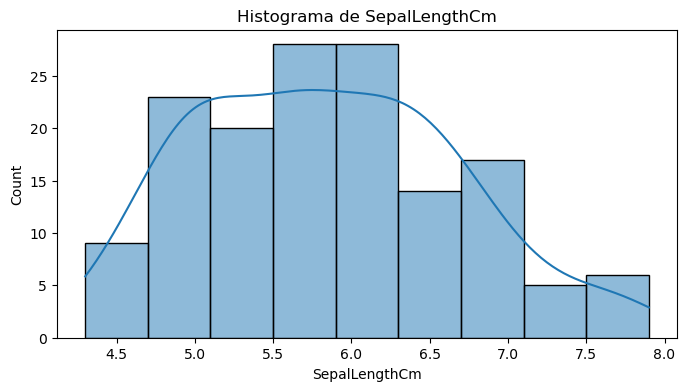

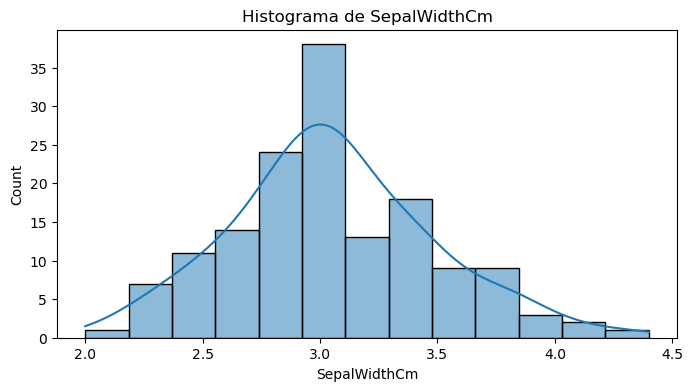

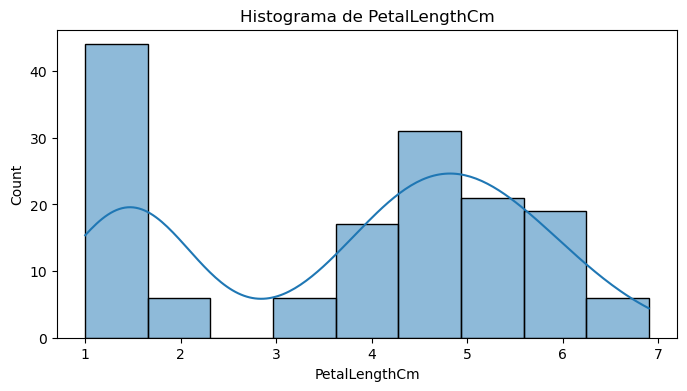

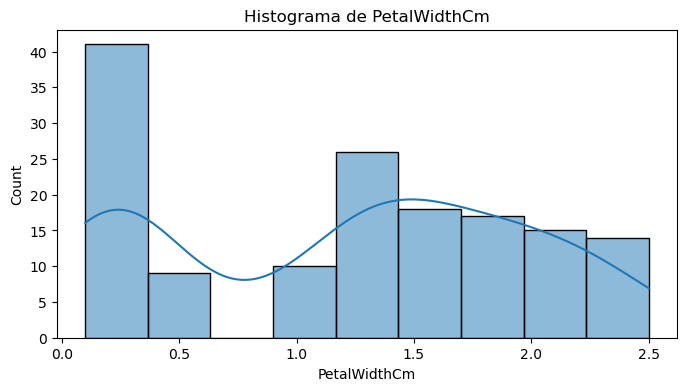

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear histogramas para cada columna numérica
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.show()


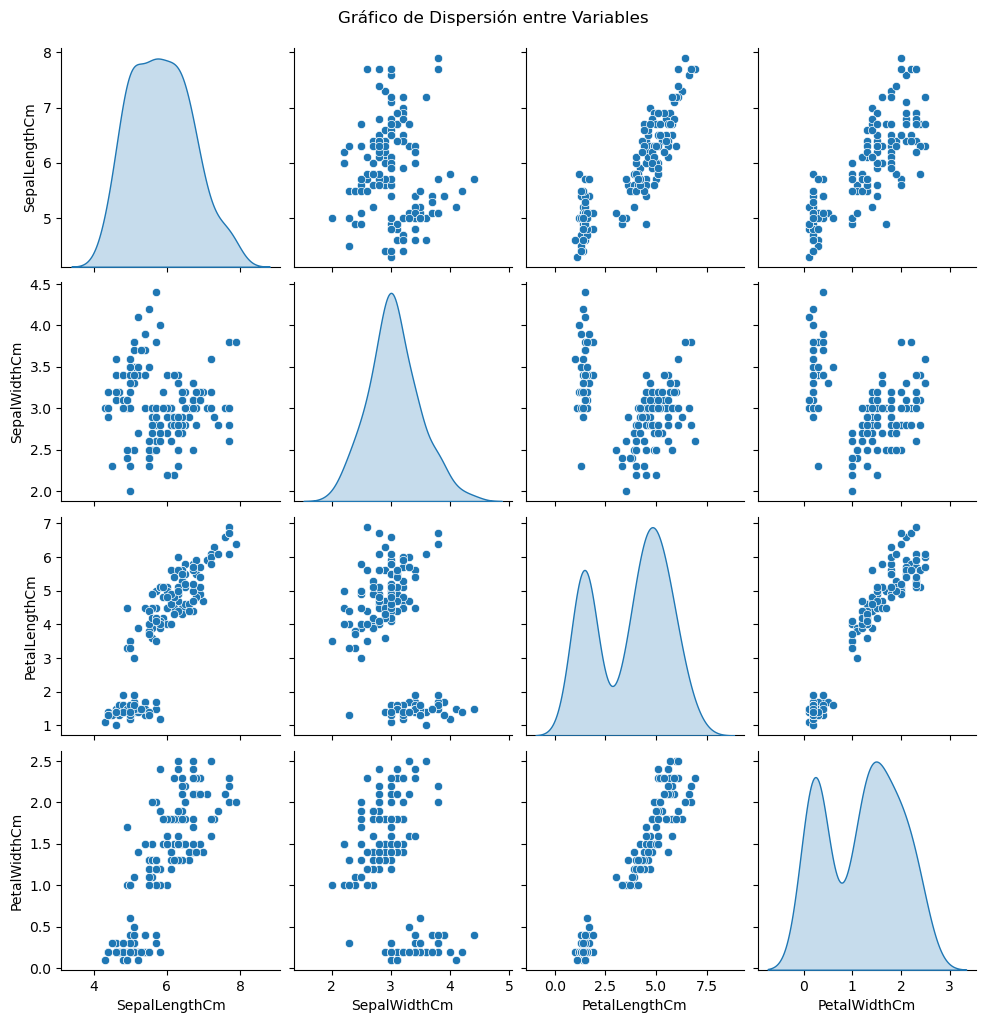

In [21]:
# Crear gráficos de dispersión entre las variables
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.suptitle('Gráfico de Dispersión entre Variables', y=1.02)
plt.show()


**Gráfico** muestra que el largo del pétalo y el ancho del pétalo están fuertemente relacionados, mientras que el largo y el ancho del sépalo tienen una relación más débil. Las distribuciones indican que las variables de longitud de pétalo y sépalo presentan mayor concentración de datos en ciertos rangos.

**Aplicación de PCA:**
* Implementa PCA para reducir las cuatro dimensiones del dataset «Iris» a solo dos componentes principales.
* Calcula la «explained variance» para estos dos componentes y discute qué porcentaje de la variabilidad total de los datos está capturada en el espacio bidimensional.

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd

# Suponiendo que df_scaled es tu DataFrame con valores nulos (NaN)
# Crear un imputador que use la media para rellenar los valores nulos
imputer = SimpleImputer(strategy='mean')

# Imputar los valores faltantes
df_scaled_imputed = imputer.fit_transform(df_scaled)

# Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled_imputed)

# Convertir los componentes principales a un DataFrame para visualización
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Mostrar una vista previa de los primeros resultados de PCA
print(df_pca.head())


        PC1       PC2
0 -2.264542  0.505704
1 -2.086426 -0.655405
2 -2.367950 -0.318477
3 -2.304197 -0.575368
4 -2.388777  0.674767


**Valores de PC1 y PC2** nos permiten reducir las dimensiones del conjunto de datos original, pero aún mantener la mayor parte de la información de las características originales. En un gráfico de dispersión, estos puntos se verían representados en un espacio bidimensional, lo que facilitaría la identificación de patrones, agrupaciones o relaciones entre las observaciones.

In [31]:
# Calcular la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Mostrar el porcentaje de varianza explicada por cada componente
print(f"Varianza explicada por PC1: {explained_variance[0]:.2f}")
print(f"Varianza explicada por PC2: {explained_variance[1]:.2f}")

# Calcular la varianza explicada total (por los dos componentes)
total_explained_variance = explained_variance.sum()
print(f"Varianza explicada total (2 componentes): {total_explained_variance:.2f}")


Varianza explicada por PC1: 0.73
Varianza explicada por PC2: 0.23
Varianza explicada total (2 componentes): 0.96


**Este resultado** demuestra que PCA ha logrado una reducción de dimensionalidad exitosa, manteniendo una alta fidelidad de la información en solo dos componentes principales, lo que permite una visualización y análisis más eficiente de los datos.

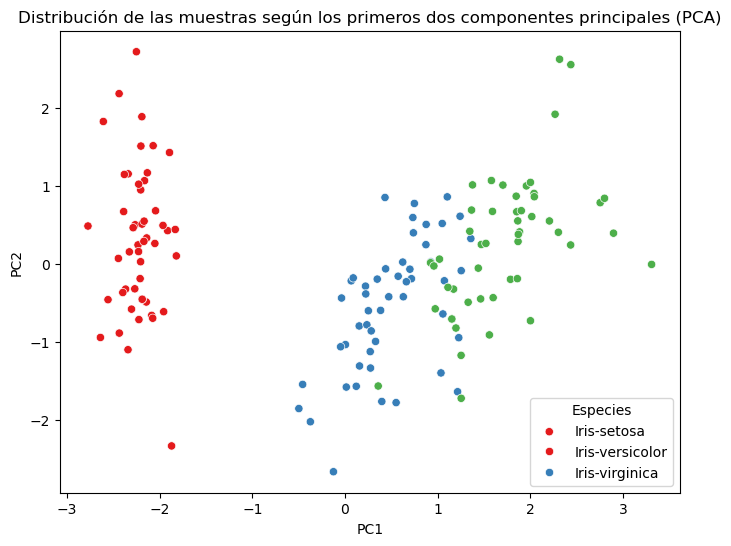

In [32]:
# Asegurarse de que 'Species' esté en formato categórico
df['Species'] = df['Species'].astype('category')

# Crear los gráficos con hue y palette de manera explícita
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df['Species'].cat.codes, palette='Set1')

# Agregar título y etiquetas
plt.title('Distribución de las muestras según los primeros dos componentes principales (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Mostrar la leyenda correctamente
plt.legend(title='Especies', labels=df['Species'].cat.categories, loc='best')  
plt.show()


**Visualización de los componentes principales:**
* Proyecta los datos en el espacio bidimensional formado por los dos primeros componentes principales.
* Utiliza diferentes colores para representar cada una de las tres clases de flores en el gráfico y observa cómo se agrupan las clases en el espacio de los componentes principales.


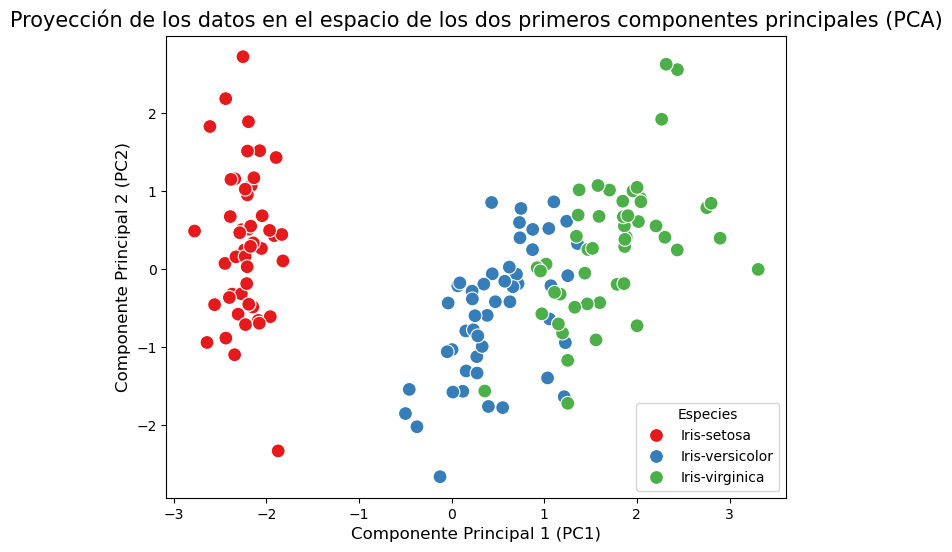

In [34]:
# Asegúrate de que df_scaled_imputed sea un DataFrame de Pandas
#df_scaled_imputed = pd.DataFrame(df_scaled_imputed, columns=df.columns[:-1])  # Elimina 'Species'

# Realizar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled_imputed)  # Ahora 'df_scaled_imputed' es un DataFrame

# Crear DataFrame con los dos primeros componentes principales
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Agregar la columna 'Species' para poder usarla en el gráfico
df_pca['Species'] = df['Species']

# Crear un gráfico de dispersión para los dos primeros componentes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Species'], palette='Set1', s=100)

# Agregar título y etiquetas
plt.title('Proyección de los datos en el espacio de los dos primeros componentes principales (PCA)', fontsize=15)
plt.xlabel('Componente Principal 1 (PC1)', fontsize=12)
plt.ylabel('Componente Principal 2 (PC2)', fontsize=12)

# Mostrar la leyenda
plt.legend(title='Especies', loc='best')

# Mostrar el gráfico
plt.show()


**Interpretación:**
* **Separación clara de Iris-setosa:** La especie Iris-setosa muestra una clara separación de las otras dos especies, lo que indica que las características numéricas del conjunto de datos (como el largo y el ancho de los sépalos y pétalos) permiten una distinción fácil y efectiva entre Iris-setosa y las otras especies.
* **Solapamiento entre Iris-versicolor e Iris-virginica:** Aunque Iris-versicolor y Iris-virginica están algo solapadas en el gráfico, todavía se observa cierta separación entre ellas. Esto podría indicar que, aunque ambas especies tienen algunas características comunes, es posible que sus diferencias no sean tan evidentes como las de Iris-setosa.

En resumen, este gráfico muestra cómo los primeros dos componentes principales del análisis PCA han sido capaces de capturar patrones de variabilidad que permiten una diferenciación visual bastante clara entre las especies Iris-setosa y las otras dos especies en el conjunto de datos, mientras que Iris-versicolor e Iris-virginica comparten algunas similitudes.

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


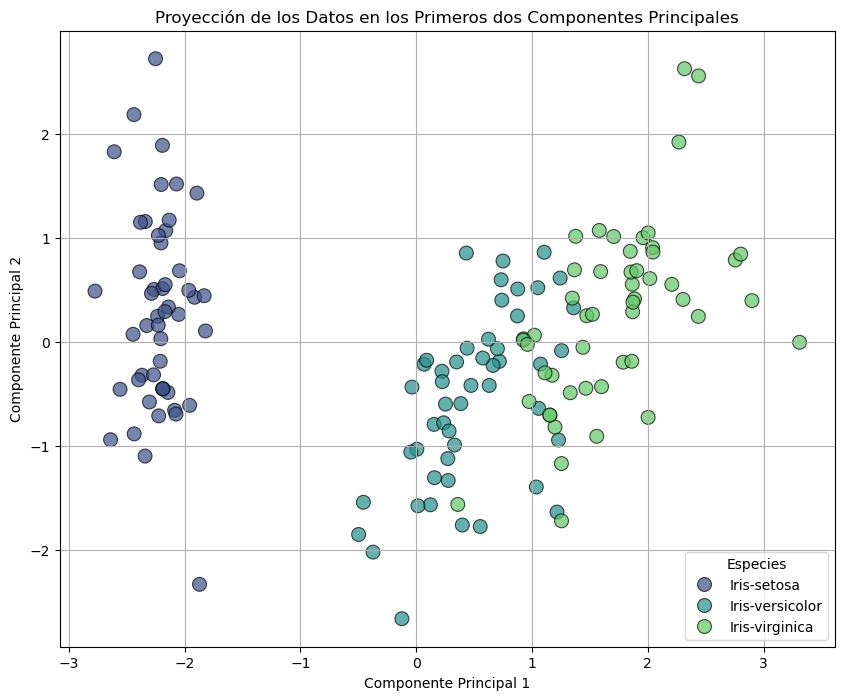

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar los datos, asumiendo que tu DataFrame es `df`
# Extraer solo las columnas numéricas para PCA (sin incluir 'Id' y 'Species')
df_numeric = df.drop(columns=['Id', 'Species'])

# Verificar si hay valores nulos en los datos numéricos
print(df_numeric.isnull().sum())  # Esto debería retornar ceros si no hay nulos

# Normalizar los datos
scaler = StandardScaler()
variables_normalizadas = scaler.fit_transform(df_numeric)

# Proyectamos los datos a los primeros dos componentes principales
pca = PCA(n_components=2)
pca_components = pca.fit_transform(variables_normalizadas)

# Crear un DataFrame con los componentes principales y la columna 'Species'
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Species'] = df['Species']  # Utilizamos 'Species' como etiqueta

# Visualizar los datos proyectados en los dos primeros componentes principales
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Species', palette='viridis', data=pca_df, s=100, edgecolor='k', alpha=0.7)
plt.title('Proyección de los Datos en los Primeros dos Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Especies')
plt.grid(True)
plt.show()


para commit